In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KernelDensity

### Definitions

Setting $n$ and $p$ for $ER_n(p)$, $ER$ being Erdos-Renyi

In [35]:
def generate_An(n: int, p: float):
    An = np.random.binomial(1, p, size=(n, n))
    np.fill_diagonal(An, val=0)
    An[np.tril_indices(n, k=-1)] = An.T[np.tril_indices(n, k=-1)]

    return An


def generate_Dn(An):
    n = An.shape[0]
    Dn = np.zeros(shape=(n, n))
    degrees = np.matrix(An).sum(axis=1)
    np.fill_diagonal(Dn, degrees)
    Dn = Dn.astype(int)

    return Dn


def generate_Deltan(An, Dn):
    laplacian = Dn - An

    return laplacian


def generate_Ln(An, Dn):
    n = An.shape[0]
    degrees = np.matrix(An).sum(axis=1)
    degrees_inv_sqrt = 1/np.sqrt(degrees)
    Dn_inv_sqrt = np.zeros(shape=(n, n))
    np.fill_diagonal(Dn_inv_sqrt, degrees_inv_sqrt)

    Ln = np.identity(n) - np.matmul(np.matmul(Dn_inv_sqrt,An), Dn_inv_sqrt)

    return Ln


def generate_Cn(An, p):
    n = An.shape[0]
    degrees = np.matrix(An).sum(axis=1)
    degrees_inv_sqrt = 1/np.sqrt(degrees)
    Dn_inv_sqrt = np.zeros(shape=(n, n))
    np.fill_diagonal(Dn_inv_sqrt, degrees_inv_sqrt)
    expected_An = np.full(shape=(n, n), fill_value=p)
    centered_An = An - expected_An

    Cn = np.matmul(np.matmul(Dn_inv_sqrt, centered_An), Dn_inv_sqrt)
    scaled_Cn = np.sqrt(n * p) *  Cn

    return scaled_Cn


def generate_Cn_hat(An, p):
    n = An.shape[0]
    degrees = np.matrix(An).sum(axis=1)
    degrees_inv_sqrt = 1/np.sqrt(degrees)
    Dn_inv_sqrt = np.zeros(shape=(n, n))
    np.fill_diagonal(Dn_inv_sqrt, degrees_inv_sqrt)

    Cn_hat = np.matmul(np.matmul(Dn_inv_sqrt, An), Dn_inv_sqrt)
    scaled_Cn_hat = np.sqrt(n * p) * Cn_hat

    return scaled_Cn_hat


def normalized_An_spectra(An, p):
    n = An.shape[0]
    centered_An = An - p
    normed_centered_An = centered_An * 1/np.sqrt(n * p * (1 - p))
    eigen_normed_An = np.linalg.eigvalsh(normed_centered_An)

    return eigen_normed_An


def normalized_Deltan_spectra(Deltan, p, x_range = np.linspace(-5, 5, 100)):
    n = Deltan.shape[0]
    normed_centered_eigen_Laplacian_n = (np.linalg.eigvalsh(Deltan) - n * p) /(np.sqrt(n * p * (1 -p)))
    Fn_Laplacian = [np.sum(normed_centered_eigen_Laplacian_n <= x)/n for x in x_range]

    return np.diff(Fn_Laplacian)


def normalized_Ln_spectra(Ln, p, x_range = np.linspace(-5, 5, 100)):
    n = Ln.shape[0]
    eigen_Ln = np.linalg.eigvalsh(Ln)
    normed_centered_eigen_Ln = (1 - eigen_Ln) * np.sqrt((n * p)/(1 - p))
    Fn_Normed_Laplacian = [np.sum(normed_centered_eigen_Ln <= x)/n for x in x_range]

    return np.diff(Fn_Normed_Laplacian)

In [33]:
n = 100
p = 0.5
x_range = np.linspace(-5, 5, 100)

In [36]:
An = generate_An(n, p)
Dn = generate_Dn(An)
laplacian = generate_Deltan(An, Dn)
Ln = generate_Ln(An, Dn)

[[0.15811388 0.         0.         ... 0.         0.         0.        ]
 [0.         0.14142136 0.         ... 0.         0.         0.        ]
 [0.         0.         0.13483997 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.1490712  0.         0.        ]
 [0.         0.         0.         ... 0.         0.15430335 0.        ]
 [0.         0.         0.         ... 0.         0.         0.13736056]]
[[0.         0.02236068 0.         ... 0.02357023 0.         0.02171861]
 [0.02236068 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.01852169]
 ...
 [0.02357023 0.         0.         ... 0.         0.02300219 0.0204765 ]
 [0.         0.         0.         ... 0.02300219 0.         0.0211952 ]
 [0.02171861 0.         0.01852169 ... 0.0204765  0.0211952  0.        ]]


Text(0.5, 1.0, 'Spectral Distribution of Centered, Normalized $A_N, N=10000$')

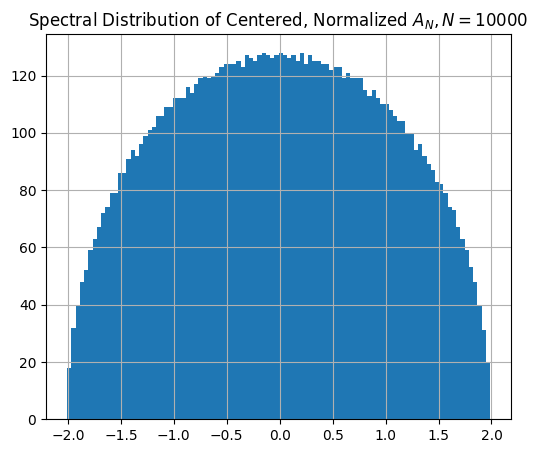

In [26]:
eigen_normed_An = normalized_An_spectra(An, p)

fig, ax = plt.subplots(figsize=(6, 5))

ax.hist(eigen_normed_An,
        bins=100)
ax.grid()

ax.set_title("Spectral Distribution of Centered, Normalized $A_N, N=%s$" % n)

Text(0.5, 0.98, 'Centered vs. Uncentered Spectral Distributions for Normazlied $A_n$, $n=10000, p=0.5$')

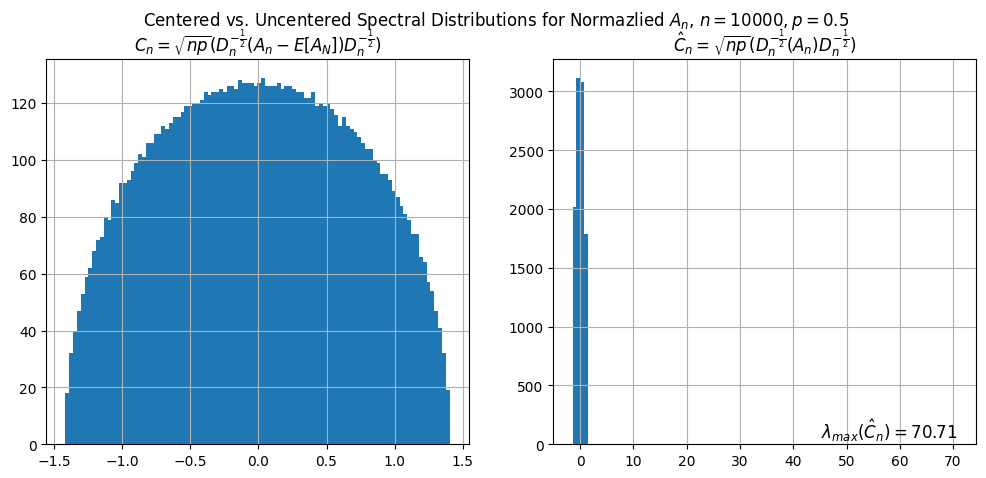

In [27]:
Cn = generate_Cn(An, p)
Cn_hat = generate_Cn_hat(An, p)

eigen_Cn = np.linalg.eigvalsh(Cn)
eigen_Cn_hat = np.linalg.eigvalsh(Cn_hat)

fig, axs = plt.subplots(figsize=(12, 5), ncols=2)

axs[0].hist(eigen_Cn,
            bins=100)
axs[0].grid()
axs[0].set_title(r'$C_n=\sqrt{np}(D_n^{-\frac{1}{2}}(A_n-E[A_N])D_n^{-\frac{1}{2}})$')

axs[1].hist(eigen_Cn_hat,
            bins=100)
axs[1].grid()
axs[1].set_title(r'$\hat{C}_n=\sqrt{np}(D_n^{-\frac{1}{2}}(A_n)D_n^{-\frac{1}{2}})$')
axs[1].text(x=max(eigen_Cn_hat),
            y=50,
            s=r'$\lambda_{max}(\hat{C}_n)=%.2f$' % max(eigen_Cn_hat),
            ha="right",
            size="large")

fig.suptitle(r'Centered vs. Uncentered Spectral Distributions for Normazlied $A_n$, $n=%s, p=%s$' % (n, p))

In [28]:
eigen_Cn_hat

array([-1.41937045, -1.41835683, -1.4158708 , ...,  1.4006621 ,
        1.40417431, 70.71067812])

In [29]:
eigen_Cn

array([-1.41942128, -1.41837171, -1.41587846, ...,  1.39872722,
        1.40067642,  1.40427683])

In [37]:
np.sqrt(10000 * 0.5)

70.71067811865476